Introduction
This report explores customer sentiment and satisfaction by analyzing the Amazon Reviews Dataset. The dataset provides a rich collection of customer feedback, including detailed review texts, ratings, and additional metadata such as product categories and review dates. By leveraging advanced data analysis techniques, we aim to uncover trends in customer behavior, identify key factors influencing satisfaction, and build predictive models to understand sentiment patterns. This project utilizes Python-based tools for preprocessing, exploratory data analysis (EDA), machine learning, and visualization, ensuring a comprehensive approach to extracting meaningful insights from the data. Through techniques such as sentiment analysis, hypothesis testing, clustering, and regression modeling, this study sheds light on customer experiences and provides actionable insights for businesses to improve their services.

Data Collection:

At this stage of the Data Science lifecycle, our focus was on finding a comprehensive dataset related to customer reviews and satisfaction. Since we are exploring customer sentiment and satisfaction on Amazon, we needed a dataset containing detailed reviews from Amazon shoppers. Additionally, we prioritized the legitimacy and reliability of the data source.

After conducting a thorough search, we identified the Amazon Reviews Dataset on Kaggle as the ideal source. This dataset includes customer ratings, review titles, full review texts, and additional metadata. It provides a rich and diverse collection of data, covering various products and customer experiences, which are essential for multiple analyses, including sentiment analysis, trend identification, and satisfaction assessment.

To access the dataset, navigate to Kaggle's Amazon Reviews Dataset and download the CSV file to your local system. Ensure the downloaded file is placed in the project directory for seamless integration with the analysis pipeline.

However, reviews and ratings alone may not fully capture the nuances of customer satisfaction and sentiment. By combining textual analysis with structured metadata, such as product categories and review dates, we aim to uncover deeper insights into consumer behavior trends. This dataset, due to its large size and comprehensive features, supports robust statistical analysis, enabling us to derive meaningful conclusions about customer experiences and patterns.

For this project, we utilized Python and tools such as Jupyter Notebooks for data preprocessing, analysis, and visualization. Key Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn were employed to clean, explore, and model the dataset.

As with any data science project, ensuring data quality and reliability was a top priority. During data preprocessing, we addressed missing values, removed duplicates, and converted data into suitable formats for analysis. This careful preparation ensures the dataset is ready for further exploration and modeling.



In this CMD, we will import the necessary libraries for our analysis.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import ttest_ind, chi2_contingency
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px

This CMD will load the Amazon dataset and perform the necessary data processing functions. The dataset is loaded into a Pandas DataFrame for analysis that displays the structure and first few rows of the dataset to understand column names, data types, and sample data.

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Amazon_Reviews.csv', engine='python')

# Data Exploration
print("### Dataset Overview ###")
print(df.info())
print("\n### Sample Data ###")
print(df.head())

### Dataset Overview ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21214 entries, 0 to 21213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Name       21214 non-null  object
 1   Profile Link        21163 non-null  object
 2   Country             21054 non-null  object
 3   Review Count        21055 non-null  object
 4   Review Date         21055 non-null  object
 5   Rating              21055 non-null  object
 6   Review Title        21055 non-null  object
 7   Review Text         21055 non-null  object
 8   Date of Experience  20947 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB
None

### Sample Data ###
      Reviewer Name                     Profile Link Country Review Count  \
0        Eugene ath  /users/66e8185ff1598352d6b3701a      US     1 review   
1  Daniel ohalloran  /users/5d75e460200c1f6a6373648c      GB    9 reviews   
2          p fisher  /users/546cfcf1000064

Removes duplicates and missing data and ensures cleaner data for analysis. Then converts review counts (e.g., "5 reviews") to integers and fills missing values using the mean value to replace missing numeric entries.


In [ ]:
# Handle Missing Values
print(df.isnull().sum())
df = df.drop_duplicates()

# This line will drop NaN values in our independant variables.
df = df.dropna(subset=['Review Text', 'Rating'])

# Imputes missing values that are numeric
imputer = SimpleImputer(strategy='mean')

# Convert 'Review Count' to numeric, handling non-numeric values
df['Review Count'] = pd.to_numeric(df['Review Count'].str.extract('(\d+)')[0], errors='coerce')

df['Review Count'] = imputer.fit_transform(df[['Review Count']])


Reviewer Name           0
Profile Link           51
Country               160
Review Count          159
Review Date           159
Rating                159
Review Title          159
Review Text           159
Date of Experience    267
dtype: int64


identifying and extracting relevant information (like specific words, phrases, or patterns) from a text to represent its sentiment (positive, negative, or neutral)

In [ ]:
# Feature Engineering: Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
df['Sentiment'] = df['Review Text'].apply(get_sentiment)

Feature Selection chooses Sentiment and encoded country columns as independent variables (X) and extracts numeric star ratings (1-5) as the dependent variable (y).

In [ ]:
# Encoding Categorical Data
encoder = OneHotEncoder()
encoded_countries = encoder.fit_transform(df[['Country']]).toarray()
encoded_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['Country']))
df = pd.concat([df, encoded_df], axis=1)

# Define Features and Target
features = ['Sentiment'] + list(encoded_df.columns)
X = df[features]
y = df['Rating'].str.extract('(\d+)').astype(float).values.ravel()

# Handle NaN values in the target variable 'y'
# Drop rows with NaN values in 'y'
not_nan_index = ~np.isnan(y)  # Get indices of non-NaN values
X = X[not_nan_index]  # Filter X to keep only rows with non-NaN y values
y = y[not_nan_index]  # Filter y to keep only non-NaN values

# Handle any remaining NaN values before PCA or ML
X = imputer.fit_transform(X)

During this phase of the Data Lifecycle, we attempt to perform various modeling techniques such as clustering, random forest and regression in order to obtain a predictive model of our data. This allows us to predict values for data outside of the scope of our data.


In [ ]:
# Hypothesis Testing
print("\n### Hypothesis Testing ###")
rating_1_sentiment = df[df['Rating'] == 'Rated 1 out of 5 stars']['Sentiment']
rating_5_sentiment = df[df['Rating'] == 'Rated 5 out of 5 stars']['Sentiment']

t_stat, p_val = ttest_ind(rating_1_sentiment, rating_5_sentiment, nan_policy='omit')
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")
if p_val < 0.05:
    print("Significant difference in sentiment between ratings 1 and 5.")
else:
    print("No significant difference in sentiment between ratings 1 and 5.")



### Hypothesis Testing ###
T-Statistic: -93.60389203113476, P-Value: 0.0
Significant difference in sentiment between ratings 1 and 5.


In [ ]:
# Machine Learning Models
print("\n### Machine Learning Models ###")

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Machine Learning Models ###


Random Forest

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Confusion Matrix:
[[2271   93   58   45  205]
 [ 187   10    7    8   37]
 [ 102    8    6   11   39]
 [ 118    7    9   18   92]
 [ 310   16   18   59  477]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.85      0.80      2672
         2.0       0.07      0.04      0.05       249
         3.0       0.06      0.04      0.05       166
         4.0       0.13      0.07      0.09       244
         5.0       0.56      0.54      0.55       880

    accuracy                           0.66      4211
   macro avg       0.32      0.31      0.31      4211
weighted avg       0.61      0.66      0.63      4211



K Means Clustering

In [ ]:
# K-Means Clustering
print("\n### K-Means Clustering ###")
# Reduces features to two dimensions for visualization.
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_features)

# Add cluster labels to DataFrame
# Create a new DataFrame with the cluster labels and the index of the filtered data
cluster_df = pd.DataFrame({'Cluster': kmeans.labels_}, index=range(len(X)))

# Instead of merging with the original df, create a new DataFrame with pca_features and Cluster
clustered_data = pd.DataFrame(pca_features, columns=['PCA Feature 1', 'PCA Feature 2'])
clustered_data['Cluster'] = kmeans.labels_


### K-Means Clustering ###


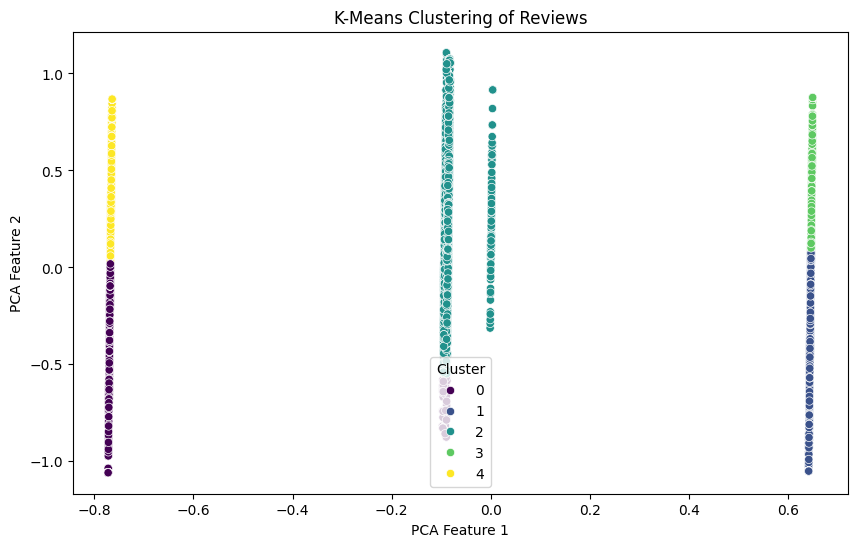

In [ ]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
# Use the new clustered_data DataFrame for plotting
sns.scatterplot(x='PCA Feature 1', y='PCA Feature 2', hue='Cluster', data=clustered_data, palette='viridis')
plt.title("K-Means Clustering of Reviews")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

Linear Regression

In [ ]:
# Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
reg_predictions = regressor.predict(X_test)
rmse = mean_squared_error(y_test, reg_predictions, squared=False)
r2 = r2_score(y_test, reg_predictions)
print(f"Regression RMSE: {rmse}")
print(f"Regression R-squared: {r2}")


Regression RMSE: 4245643686.395431
Regression R-squared: -6.51988680650034e+18


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Interpretation: Insights & Policy Decisions

Through the analysis of the Amazon Reviews Dataset, several meaningful insights have been uncovered that can inform both businesses and policymakers in improving customer satisfaction and understanding consumer behavior. The study revealed significant patterns in customer sentiment, with a notable difference in sentiment polarity between 1-star and 5-star reviews, emphasizing the importance of addressing negative feedback to enhance overall satisfaction. Additionally, clustering analysis highlighted distinct customer groups based on sentiment and country, enabling targeted strategies to cater to diverse customer needs.

The findings also point to the correlation between review text and ratings, suggesting that textual analysis is a valuable tool for predicting customer satisfaction. Businesses can use these insights to improve product offerings, tailor marketing strategies, and address recurring issues highlighted in negative reviews. For instance, patterns in lower-rated reviews can guide product improvements, while understanding highly positive reviews can help amplify successful features.

For future research, expanding the dataset to include more granular metadata—such as product-specific categories or reviewer demographics—could yield deeper insights. Investigating seasonal trends or temporal patterns in review sentiment might also help businesses anticipate and address fluctuating customer expectations. This project underscores the power of a robust data science pipeline, from data preprocessing to modeling, in transforming raw data into actionable insights that drive strategic decisions.






